# Logistic Regression - Reminder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split

In [2]:
# Load the digit dataset
data = datasets.load_digits(n_class=10)
print(data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
data["images"].shape

(1797, 8, 8)

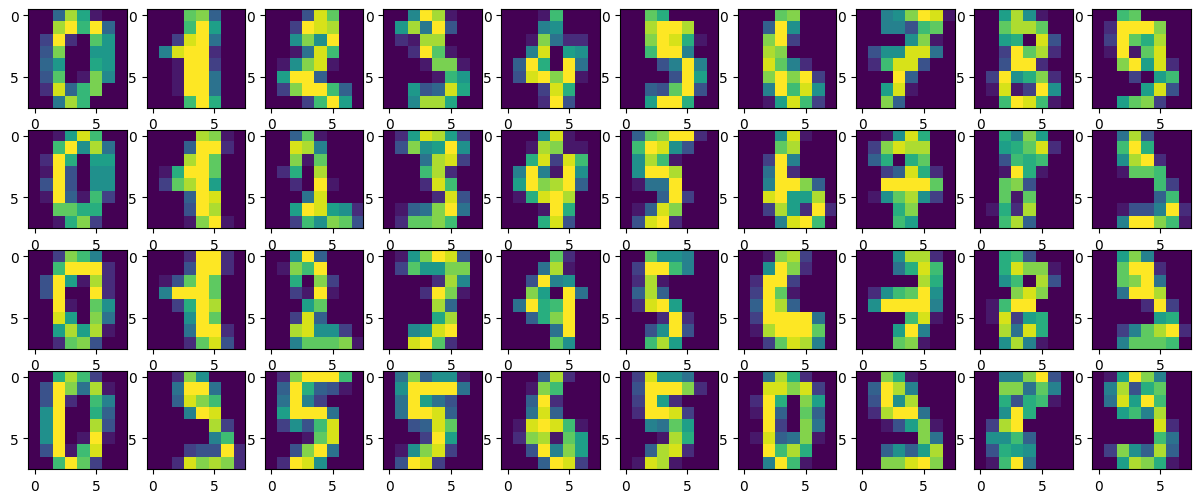

In [4]:
plt.figure(figsize=(15,6))
for i in range(4*10):
  plt.subplot(4,10,i+1), plt.imshow(data["images"][i])

In [5]:
X = data['data']
y = data['target']

print("shape of X =", X.shape) # number of samples x number of colums/features
print("shape of y =", y.shape)
print("feature names:", data["feature_names"])

shape of X = (1797, 64)
shape of y = (1797,)
feature names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [6]:
df = pd.DataFrame(X, columns=data["feature_names"])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


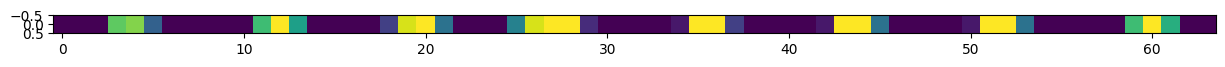

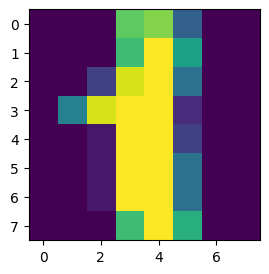

In [7]:
idx = 1
plt.figure(figsize=(15,2))
plt.imshow(np.expand_dims(X[idx],0))
plt.show()
plt.figure(figsize=(3,3))
plt.imshow(np.reshape(X[idx],(8,8)))

In [8]:
y[25:32]

array([5, 6, 7, 8, 9, 0, 9])

In [9]:
X_norm = preprocessing.minmax_scale(X)
df = pd.DataFrame(X_norm, columns=data["feature_names"])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=50)

In [11]:
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
model = model.fit(X_train, y_train)

y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 98.46903270702853
Testing accuracy (%) = 96.94444444444444


# Neural Network

In [12]:
from sklearn.neural_network import MLPClassifier # Multi-layer perceptron

In [13]:
model = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(50,30,5), alpha=0.001, activation="relu")
# how to tune these hyperparameters - activation, hidden layer size


model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 100.0
Testing accuracy (%) = 95.27777777777777


# Lets try larger dataset with larger models

In [14]:
from keras.datasets import mnist

In [15]:
dataset = mnist.load_data()
(X_train, y_train), (X_test, y_test) = dataset

11490434/11490434 [==============================] - 0s 0us/step


In [16]:
print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)

shape of X = (60000, 28, 28)
shape of y = (60000,)


In [17]:
28*28

784

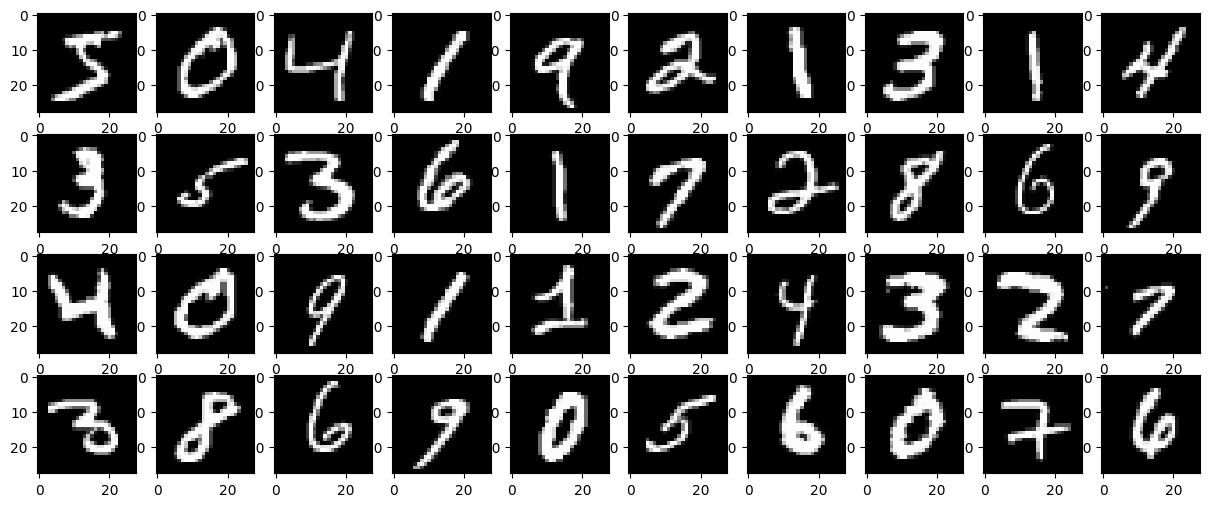

In [18]:
plt.figure(figsize=(15,6))
for i in range(4*10):
  plt.subplot(4,10,i+1), plt.imshow(X_train[i], cmap='gray')

In [19]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
print("shape of X =", X_train.shape)

shape of X = (60000, 784)


In [21]:
model = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(10,4), alpha=0.001, activation="relu")

model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 92.64666666666666
Testing accuracy (%) = 90.44
